# Import Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
from joblib import dump

import warnings
warnings.filterwarnings('ignore')

# Data Undestanding

**Application Record**

| **Feature Name**        | **Explanation**                   | **Remarks**                                                                 |
|-------------------------|-----------------------------------|------------------------------------------------------------------------------|
| ID                      | Client number                     |                                                                              |
| CODE_GENDER             | Gender                            |                                                                              |
| FLAG_OWN_CAR            | Is there a car                    |                                                                              |
| FLAG_OWN_REALTY         | Is there a property               |                                                                              |
| CNT_CHILDREN            | Number of children                |                                                                              |
| AMT_INCOME_TOTAL        | Annual income                     |                                                                              |
| NAME_INCOME_TYPE        | Income category                   |                                                                              |
| NAME_EDUCATION_TYPE     | Education level                   |                                                                              |
| NAME_FAMILY_STATUS      | Marital status                    |                                                                              |
| NAME_HOUSING_TYPE       | Way of living                     |                                                                              |
| DAYS_BIRTH              | Birthday                          | Count backwards from current day (0), -1 means yesterday                     |
| DAYS_EMPLOYED           | Start date of employment          | Count backwards from current day (0). If positive, the person is unemployed |
| FLAG_MOBIL              | Is there a mobile phone           |                                                                              |
| FLAG_WORK_PHONE         | Is there a work phone             |                                                                              |
| FLAG_PHONE              | Is there a phone                  |                                                                              |
| FLAG_EMAIL              | Is there an email                 |                                                                              |
| OCCUPATION_TYPE         | Occupation                        |                                                                              |
| CNT_FAM_MEMBERS         | Family size                       |                                                                              |

<br><br>

**Credit record**

| **Feature Name**   | **Explanation**        | **Remarks**                                                                                                         |
|--------------------|------------------------|----------------------------------------------------------------------------------------------------------------------|
| ID                 | Client number          |                                                                                                                      |
| MONTHS_BALANCE     | Record month           | The month of the extracted data is the starting point, backwards. 0 is current month, -1 previous, and so on.        |
| STATUS             | Status                 | 0: 1–29 days past due  <br> 1: 30–59 days past due <br> 2: 60–89 days overdue <br> 3: 90–119 days overdue <br> 4: 120–149 days overdue <br> 5: Overdue >150 days or write-off <br> C: Paid off that month <br> X: No loan for the month |


## Load Data

In [2]:
# # Load data 1
# df1 = pd.read_csv('application_record.csv')
# df1

In [3]:
# Load data 1
df1 = pd.read_csv('https://raw.githubusercontent.com/wahyughifari/Credit-Card-Approval/refs/heads/main/Dataset/application_record.csv')
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
# Info data 1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# # Load data 2
# df2 = pd.read_csv('credit_record.csv')
# df2

In [6]:
# Load data 2
df2 = pd.read_csv('https://raw.githubusercontent.com/wahyughifari/Credit-Card-Approval/refs/heads/main/Dataset/credit_record.csv')
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [7]:
# Info data 2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Merged Dataset

In [8]:
# Define the worst status per customer

def get_worst_status(status_list):
    bad_statuses = ['2', '3', '4', '5']
    for s in bad_statuses:
        if s in status_list:
            return "bad client"
    return "good client"

In [9]:
# Aggregate credit status per customer ID
client_status = df2.groupby('ID')['STATUS'].apply(lambda x: get_worst_status(set(x)))

# Convert Series to DataFrame
client_status = client_status.reset_index()
client_status.columns = ['ID', 'CUSTOMER']

In [10]:
# Merge application record with the target labels
merged_df = pd.merge(df1, client_status, on='ID', how='inner')

merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good client
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good client
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,good client
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good client
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,bad client
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,bad client
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,bad client
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,bad client


In [11]:
# Create a new column for age (in years) by converting negative birth days to positive years
merged_df['AGE_YEARS'] = (merged_df['DAYS_BIRTH'].abs() // 365)

# Create a new column for years of employment
merged_df['YEARS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else abs(x) // 365)

In [12]:
# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)

merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good client,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good client,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,good client,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good client,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good client,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,bad client,47,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,bad client,33,3
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,bad client,33,3
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,bad client,49,1


In [13]:
# Info merged data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## Missing Value

In [14]:
# Check missing value
merged_df.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [15]:
# Fill missing occupation with 'Unknown'
merged_df['OCCUPATION_TYPE'] = merged_df['OCCUPATION_TYPE'].fillna('Unknown')

In [16]:
# Check missing value
merged_df.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


## Duplicated Data

In [17]:
# Check duplicate
merged_df.duplicated().sum()

np.int64(0)

## Outlier

In [18]:
cols_to_cap = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'AGE_YEARS']

In [19]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

In [20]:
df_capped = merged_df.copy()

# capping outlier
for col in cols_to_cap:
    df_capped = cap_outliers_iqr(df_capped, col)

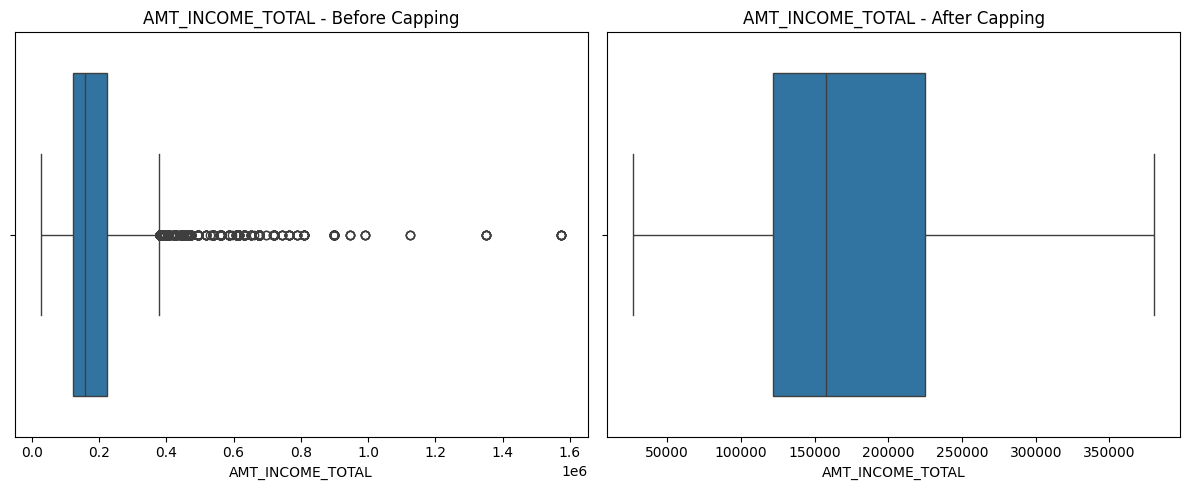

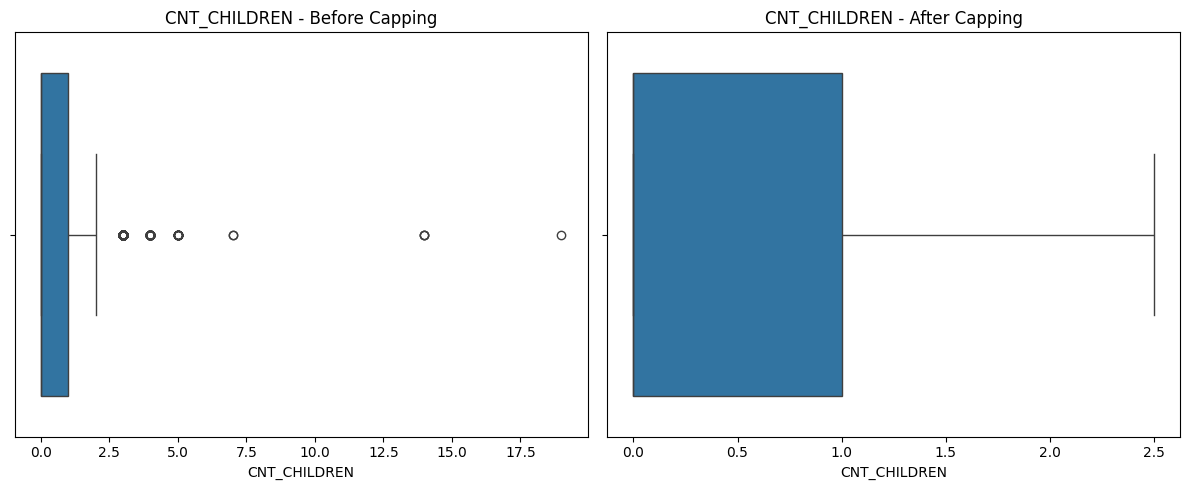

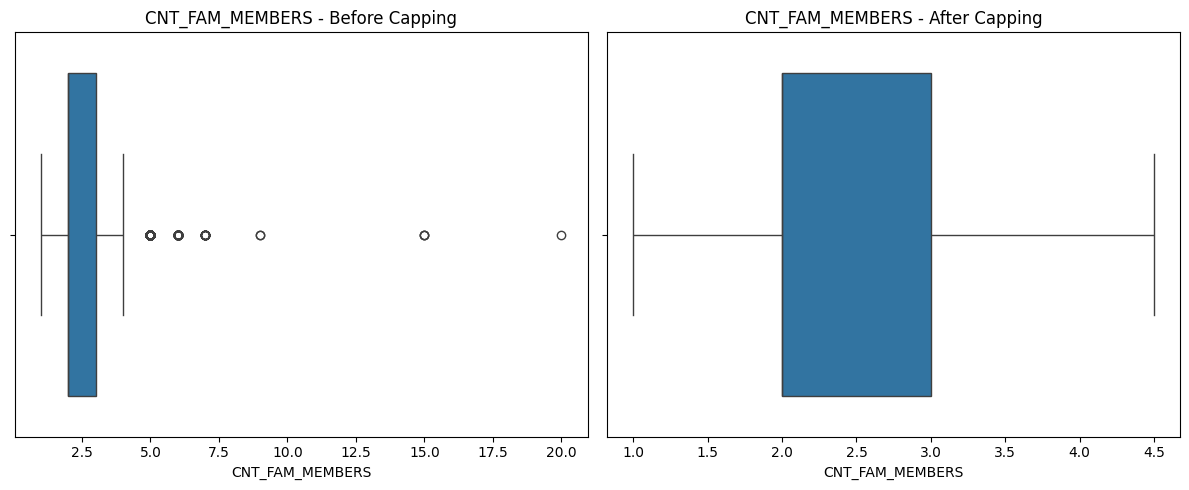

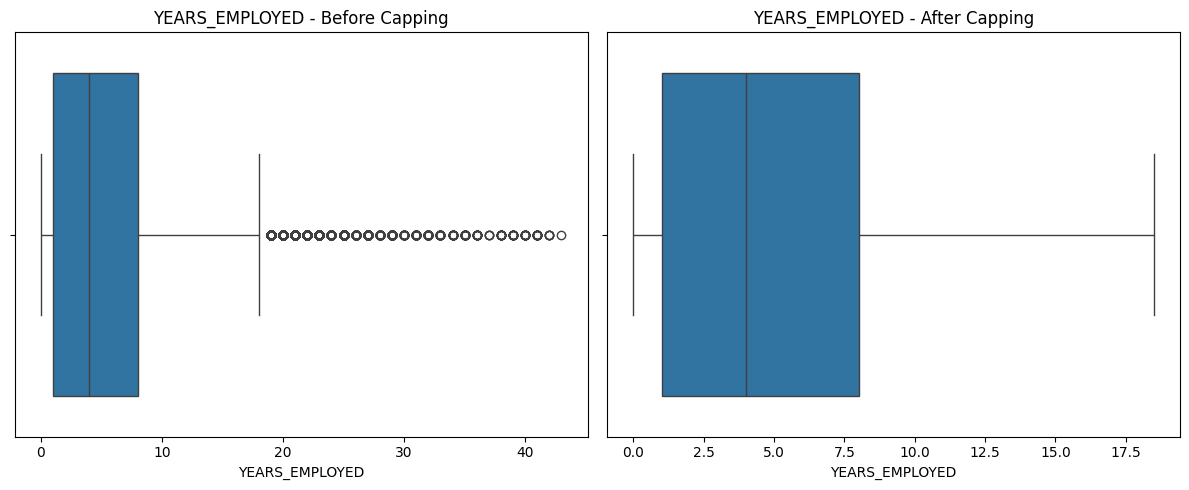

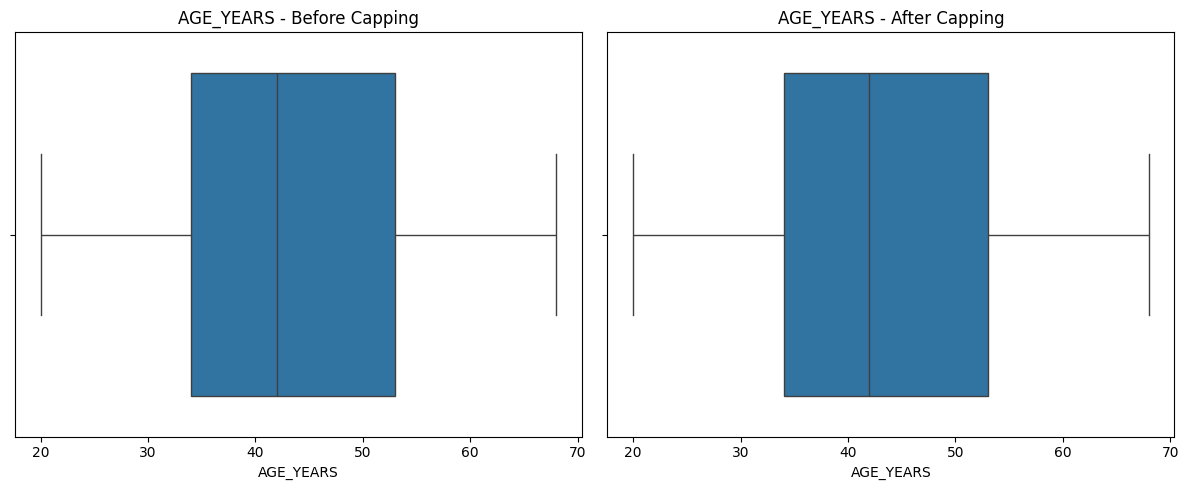

In [21]:
for col in cols_to_cap:
    plt.figure(figsize=(12, 5))

    # before
    plt.subplot(1, 2, 1)
    sns.boxplot(x=merged_df[col])
    plt.title(f'{col} - Before Capping')

    # after
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col} - After Capping')

    plt.tight_layout()
    plt.show()

In [22]:
# drop days_birth and days_empployed
df_capped = df_capped.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [23]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  float64
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  object 
 15  CNT_FAM_MEMBERS      36457 non-null 

# Exploratory Data Analysis

## Customer Distribution

In [24]:
# Customer Distribution
df_capped['CUSTOMER'].value_counts(normalize=True).reset_index()

,CUSTOMER,proportion
0,good client,0.983103
1,bad client,0.016897


In [25]:
# Calculate the proportion of each customer type
customer_dist = df_capped['CUSTOMER'].value_counts(normalize=True).reset_index()
customer_dist.columns = ['CUSTOMER', 'PERCENT']
customer_dist['PERCENT'] = customer_dist['PERCENT'] * 100

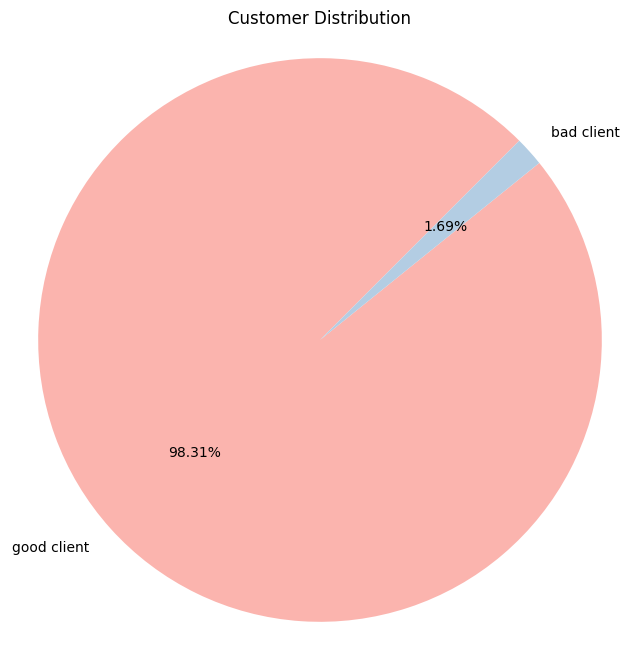

In [26]:
# Create Bar plot
plt.figure(figsize=(8, 8))
plt.pie(
    customer_dist['PERCENT'],
    labels=customer_dist['CUSTOMER'],
    autopct='%1.2f%%',
    startangle=45,
    colors=plt.get_cmap('Pastel1').colors
)
plt.title('Customer Distribution')
plt.axis('equal')
plt.show()

In [27]:
print(customer_dist)

      CUSTOMER    PERCENT
0  good client  98.310338
1   bad client   1.689662


## Gender vs Customer

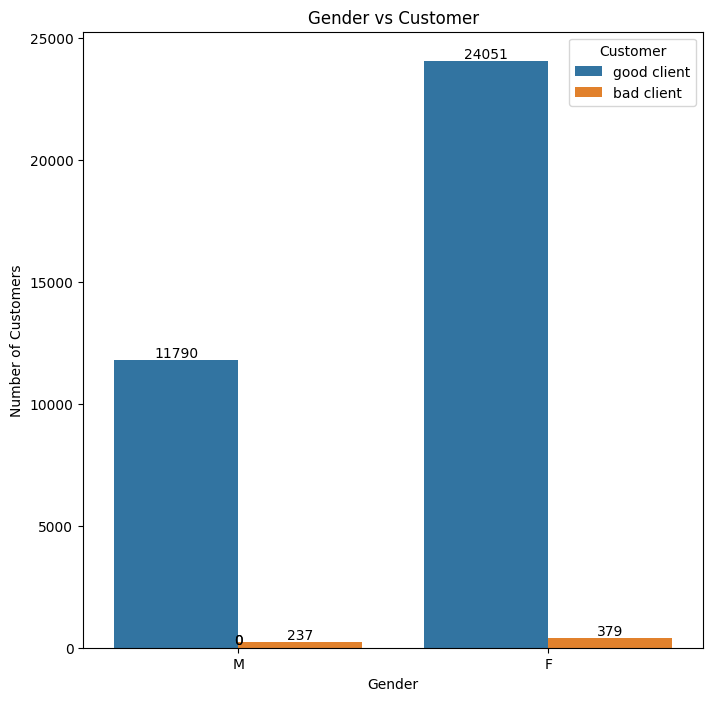

In [28]:
# Barplot gender vs target
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='CODE_GENDER', hue='CUSTOMER', data=df_capped)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Gender vs Customer')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Customer')
plt.show()

## Age Distribution

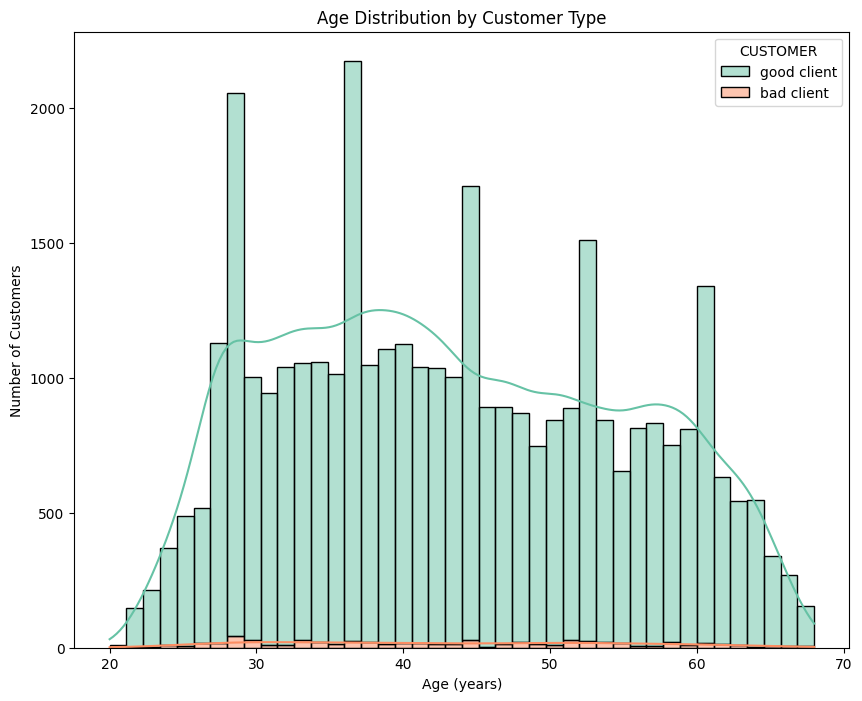

In [29]:
# Age distribution
plt.figure(figsize=(10, 8))
sns.histplot(data=df_capped, x='AGE_YEARS', hue='CUSTOMER', kde=True, multiple='stack', palette='Set2')

plt.title('Age Distribution by Customer Type')
plt.xlabel('Age (years)')
plt.ylabel('Number of Customers')
plt.show()

## Income Category vs Customer

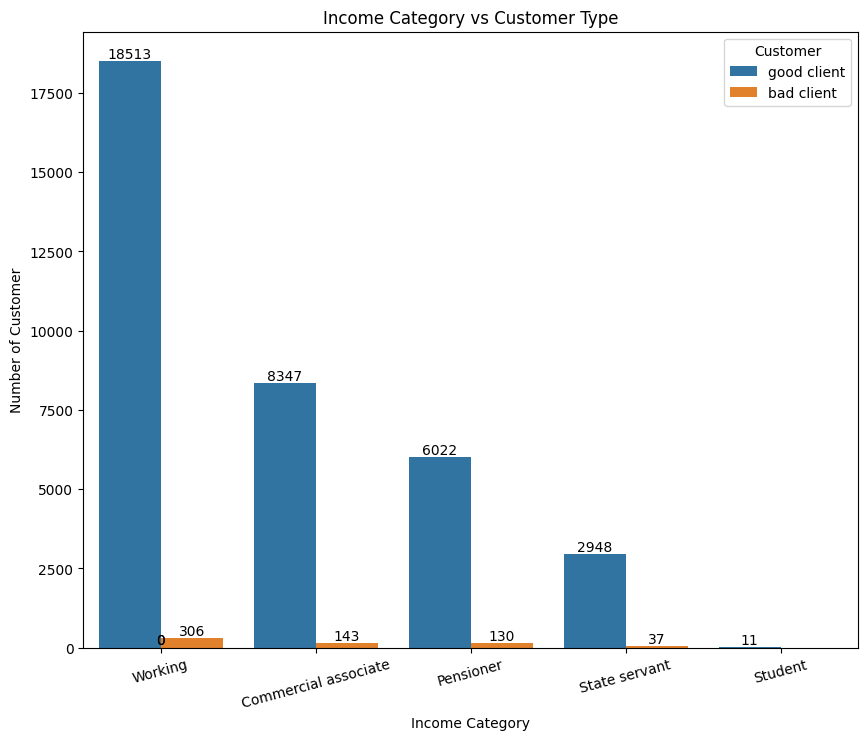

In [30]:
# Income Category vs Customer Type
plt.figure(figsize=(10, 8))
ax=sns.countplot(x='NAME_INCOME_TYPE', hue='CUSTOMER', data=df_capped)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Income Category vs Customer Type')
plt.xlabel('Income Category')
plt.ylabel('Number of Customer')
plt.xticks(rotation=15)
plt.legend(title='Customer')
plt.show()

## Occupation Type by Customer

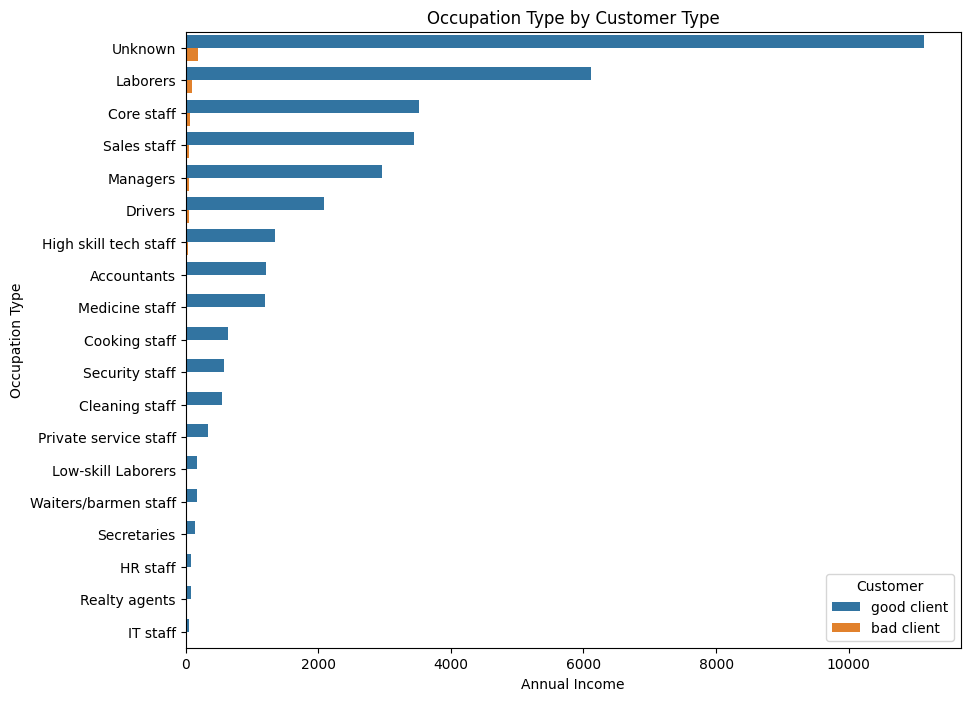

In [31]:
# Occupation Type by Customer Type
plt.figure(figsize=(10, 8))
sns.countplot(y='OCCUPATION_TYPE', hue='CUSTOMER', data=df_capped, order=merged_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Occupation Type by Customer Type')
plt.xlabel('Annual Income')
plt.ylabel('Occupation Type')
plt.legend(title='Customer', loc='lower right')
plt.show()

## Family Status vs Customer

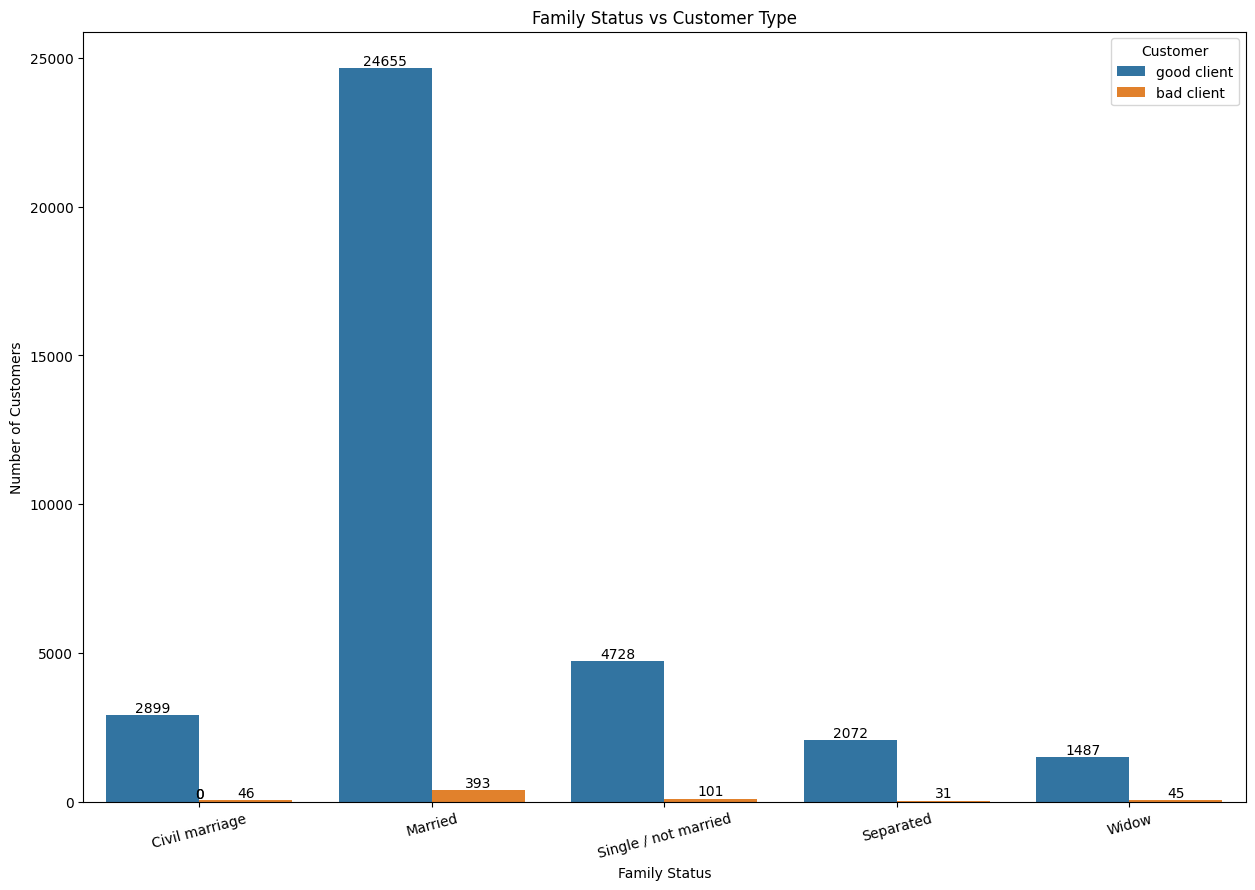

In [32]:
# Family Status vs Customer Type
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='NAME_FAMILY_STATUS', hue='CUSTOMER', data=df_capped)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Family Status vs Customer Type')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.legend(title='Customer')
plt.show()

## Correlation Metrix

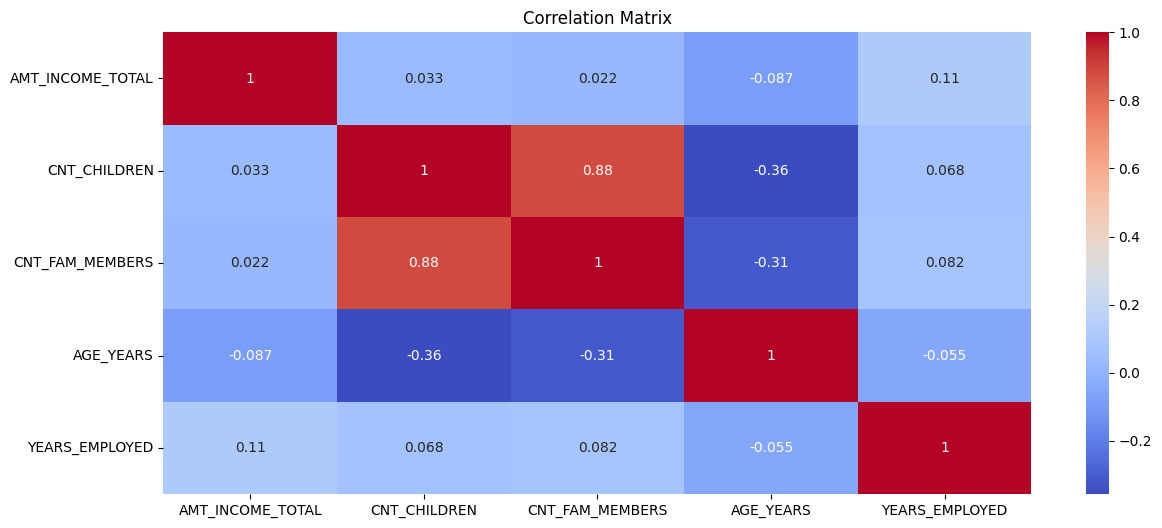

In [33]:
# Correlation Metrix
corr = df_capped[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED']].corr()
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
corr

,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.033121,0.021687,-0.087173,0.110815
CNT_CHILDREN,0.033121,1.000000,0.878390,-0.357063,0.068414
CNT_FAM_MEMBERS,0.021687,0.878390,1.000000,-0.311852,0.081843
AGE_YEARS,-0.087173,-0.357063,-0.311852,1.000000,-0.054504
YEARS_EMPLOYED,0.110815,0.068414,0.081843,-0.054504,1.000000


# Data Preprocessing

## Cardinality

In [35]:
# cardinality
cardinal_cols = df_capped.select_dtypes(include='object').columns

for col in cardinal_cols:
    print(f"{col}: {df_capped[col].nunique()} unique values")

CODE_GENDER: 2 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
NAME_INCOME_TYPE: 5 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 5 unique values
NAME_HOUSING_TYPE: 6 unique values
OCCUPATION_TYPE: 19 unique values
CUSTOMER: 2 unique values


## Encode

In [36]:
categorical_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

In [37]:
# encode categorical
df_encoded = pd.get_dummies(df_capped, columns=categorical_cols, drop_first=True)

In [38]:
df_encoded.dtypes

,0
ID,int64
CNT_CHILDREN,float64
AMT_INCOME_TOTAL,float64
FLAG_MOBIL,int64
FLAG_WORK_PHONE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
CNT_FAM_MEMBERS,float64
CUSTOMER,object
AGE_YEARS,int64


In [39]:
# encode target
df_encoded['CUSTOMER'] = df_encoded['CUSTOMER'].map({'good client': 0, 'bad client': 1})

## Feature Scalling

In [40]:
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED']

# feature scalling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

## Split data

In [41]:
# feature and target split
X = df_encoded.drop(columns=['ID', 'CUSTOMER'])
y = df_encoded['CUSTOMER']

In [42]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Handle Imbalance

In [43]:
#smote = SMOTE(random_state=42)
X_train_res, y_train_res = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [44]:
print("After SMOTE:")
print(y_train_res.value_counts())

After SMOTE:
CUSTOMER
0    28672
1    28672
Name: count, dtype: int64


#Baseline Model

## Logistic Regression

In [45]:
# model definition
logreg = LogisticRegression(class_weight='balanced', random_state=42)

In [46]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)

In [47]:
# model training
logreg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', random_state=42)

In [48]:
# model prediction
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [49]:
# Evaluasi
print("Confusion Matrix Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix Logistic Regression:
[[5800 1369]
 [ 102   21]]

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7169
           1       0.02      0.17      0.03       123

    accuracy                           0.80      7292
   macro avg       0.50      0.49      0.46      7292
weighted avg       0.97      0.80      0.87      7292

ROC AUC Score: 0.48964489156678426


# Alternative Model

## Random Forest

In [50]:
# model definition
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
# model training
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [52]:
# model prediction
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [53]:
# Evaluasi
print("Confusion Matrix Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix Random Forest:
[[7104   65]
 [  95   28]]

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.30      0.23      0.26       123

    accuracy                           0.98      7292
   macro avg       0.64      0.61      0.62      7292
weighted avg       0.98      0.98      0.98      7292

ROC AUC Score: 0.8278325718115599


## XGBoost

In [54]:
# Model defintion
xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res),
    use_label_encoder=False, eval_metric='logloss', random_state=42
)

In [55]:
# Model training
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [56]:
# model prediction
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [57]:
# Evaluasi
print("Confusion Matrix XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Confusion Matrix XGBoost:
[[7022  147]
 [  91   32]]

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7169
           1       0.18      0.26      0.21       123

    accuracy                           0.97      7292
   macro avg       0.58      0.62      0.60      7292
weighted avg       0.97      0.97      0.97      7292

ROC AUC Score: 0.6632344318979527


## K-Nearest Neighbors (KNN)

In [58]:
# Model defintion
knn_model = KNeighborsClassifier(n_neighbors=5)

In [59]:
# Model training
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [60]:
# Model prediction
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

In [61]:
# Evaluasi
print("Confusion Matrix KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_knn))

Confusion Matrix KNN:
[[6941  228]
 [  87   36]]

Classification Report KNN:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7169
           1       0.14      0.29      0.19       123

    accuracy                           0.96      7292
   macro avg       0.56      0.63      0.58      7292
weighted avg       0.97      0.96      0.96      7292

ROC AUC Score: 0.7137829203651221


# Hyperparameter Tuning

In [62]:
# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [63]:
# Model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [64]:
# Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [65]:
# Fit model
%%time
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 35.3 s, sys: 3.49 s, total: 38.8 s
Wall time: 34min 14s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [66]:
# Best model
best_rf = random_search.best_estimator_

# Predict
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

In [67]:
# Evaluation
print("Best Parameters:", random_search.best_params_)
print("Best AUC (CV):", random_search.best_score_)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report After HyperParameter Tuning")
print(classification_report(y_test, y_pred_best))

print("AUC Score:", roc_auc_score(y_test, y_proba_best))

Best Parameters: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': True}
Best AUC (CV): 0.9967604637218574

Confusion Matrix:
[[7104   65]
 [  95   28]]

Classification Report After HyperParameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.30      0.23      0.26       123

    accuracy                           0.98      7292
   macro avg       0.64      0.61      0.62      7292
weighted avg       0.98      0.98      0.98      7292

AUC Score: 0.8302611628431809


# Model Saving

In [68]:
# model saving
dump(rf_model, 'rf_model.joblib')

# scaler saving
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [71]:
#  feature column
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.joblib')

['feature_columns.joblib']